

# **Lab | Customer Analysis Round 2**

In [38]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#creating dataframa from source file
url='https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-2/master/files_for_lab/csv_files/marketing_customer_analysis.csv'
data = pd.read_csv(url)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
#standardizing the header names
column_names = data.columns
column_names

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [42]:
#changing column headers to lowercase
cols =[]
for column_name in data.columns:
  cols.append(column_name.lower())
column_names = cols

#cols

In [43]:
data.shape

(9134, 24)

In [44]:
# numeric data

data._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [45]:
data.select_dtypes('object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [82]:
#find null values
data.isna().sum()
#data.dtypes

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
response rate                    0
dtype: int64

In [47]:
#Datetime format- Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie Jan Feb and March
import time
from datetime import time

data['Effective To Date'] = pd.to_datetime(data['Effective To Date'],errors='coerce')
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [90]:
#filter the data for the first quarter:

#data.loc[data['months']<4]
#data.loc[data['Effective To Date']<'2011-04-01']
#data['Effective To Date'][0].month
#month_li = lambda x:data['Effective To Date'][x].month
#data['month1'] = list(map(lambda x:data['Effective To Date'][x].month,data['Effective To Date']))
#data.head()



In [49]:
data.sample(6)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8224,WX52894,Nevada,25002.018830,No,Basic,College,2011-01-10,Employed,M,21927,Rural,Married,71,32,40,0,2,Personal Auto,Personal L2,Offer2,Call Center,128.624785,Four-Door Car,Medsize
1976,DE18949,Oregon,16344.608090,No,Basic,College,2011-01-16,Employed,F,57029,Rural,Married,68,24,97,0,2,Corporate Auto,Corporate L3,Offer1,Call Center,135.788525,Two-Door Car,Small
7447,AH53588,California,4636.546470,Yes,Basic,College,2011-01-01,Retired,M,26802,Suburban,Married,66,7,43,1,5,Personal Auto,Personal L2,Offer2,Agent,316.800000,Two-Door Car,Medsize
5108,FL74984,Oregon,2744.083863,No,Basic,Bachelor,2011-02-01,Employed,M,79192,Suburban,Divorced,70,11,74,0,1,Personal Auto,Personal L3,Offer2,Call Center,336.000000,Two-Door Car,Small
6822,WM64930,Oregon,5253.487908,No,Premium,College,2011-02-08,Medical Leave,M,12811,Suburban,Married,150,27,0,2,1,Corporate Auto,Corporate L2,Offer2,Call Center,720.000000,SUV,Medsize
6891,XJ92660,Nevada,5017.851448,No,Basic,Master,2011-02-07,Employed,F,79814,Rural,Married,62,18,50,0,3,Personal Auto,Personal L2,Offer4,Branch,31.553152,Four-Door Car,Medsize


In [50]:
#BONUS: Put all the previously mentioned data transformations into a function.

#def date_trans(date):
  #data['Effective To Date'] = pd.to_datetime(data['Effective To Date'],errors='coerce')

# **Lab | Customer Analysis Round 3**

**EDA (Exploratory Data Analysis)**

In [51]:
#show info of the dataframe

data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [52]:
data.describe(include =[np.object])

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,NQ45562,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


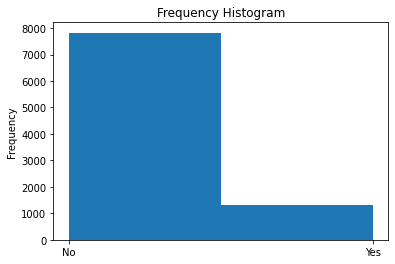

In [53]:
#next four tasks are plotting so need to import libraries
import matplotlib.pyplot as plt
import seaborn as sns

x = data['Response']
plt.hist(x, bins=2)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

Text(0.5, 1.0, 'Sales Channel v response rate')

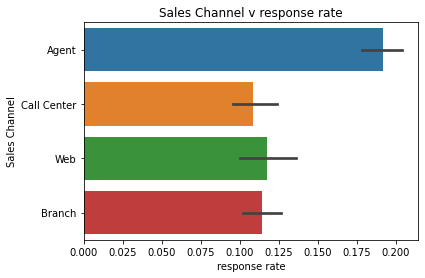

In [54]:
#Show a plot of the response rate by the sales channel.


#from collections import counter
def resp_rate(x):
  if x== "No":
    return 0
  else:
    return 1

data['response rate'] = list(map(resp_rate,data['Response']))
#objects = data['response rate']
#y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
ax = sns.barplot(x="response rate",y="Sales Channel", data=data)
#plt.barh(y_pos, performance, align='center')
#plt.xlabel('Usage')
plt.title('Sales Channel v response rate')

plt.show()

#plt.scatter(x="response rate",y="Sales Channel")

#plt.show()

#plt.hist(x, bins=)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

#plt.hist(x, bins=2)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
#Show a plot of the response rate by income.
#plt.scatter(x=data['reponse rate'],y=data['Sales Channel'])
#plt.show()

Text(0.5, 1.0, 'Total Claim Amount v response rate by Sales Channel')

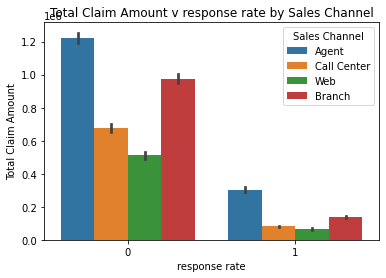

In [55]:
#Show a plot of the response rate by the total claim amount.
#ax = sns.barplot(x="response rate", y="Total Claim Amount", data=data,estimator = np.sum)
#plt.title('Total Claim Amount v response rate')
ax = sns.barplot(x="response rate", y="Total Claim Amount", hue="Sales Channel", data=data,estimator = np.sum)

plt.title('Total Claim Amount v response rate by Sales Channel')
#ax = sns.barplot(x="response rate", y="Total Claim Amount", data=data, label = "Response rate", color="b")

#plt.barh(y_pos, performance, align='center')
#plt.xlabel('Usage')


plt.show()

Text(0.5, 1.0, 'Reponse vs Income')

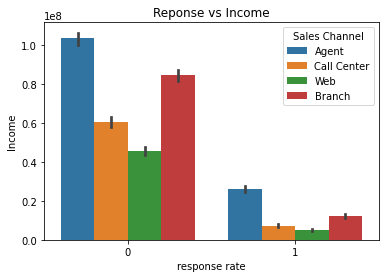

In [56]:
#Show a plot of the response rate by income
#y_positions = range(len(data['response rate']))

ax = sns.barplot(x="response rate", y="Income", hue="Sales Channel", data=data, estimator=np.sum)


plt.title("Reponse vs Income")
plt.show()




# **Lab | Customer Analysis Round 4**

In [57]:
data.shape

(9134, 25)

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [58]:
data.dtypes #checking the data types of the columns


Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [59]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)
print("------")
numerical.dtypes
print("------")
print("------")
categorical.dtypes
#data['numerical'] = data._get_numeric_data()  #getting numeric data types, and creating a column
#data['categorical'] =data.select_dtypes('object') #getting categorical data types, and creating a column
#data['numerical'].dtypes

------


Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
response rate                      int64
dtype: object

------
------


Customer            object
State               object
Response            object
Coverage            object
Education           object
EmploymentStatus    object
Gender              object
Location Code       object
Marital Status      object
Policy Type         object
Policy              object
Renew Offer Type    object
Sales Channel       object
Vehicle Class       object
Vehicle Size        object
dtype: object

In [60]:
#data.select_dtypes('object')
numerical.shape

(9134, 9)

In [61]:
categorical.shape

(9134, 15)

2. Now we will try to check the normality of the numerical variables visually

  1. Use seaborn library to construct distribution plots for the numerical variables
  2. Use Matplotlib to construct histograms
  3. Do the distributions for different numerical variables look like a normal distribution

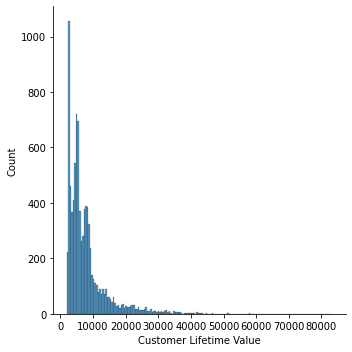

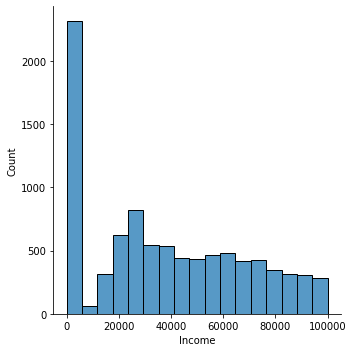

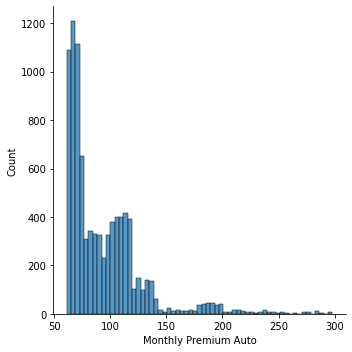

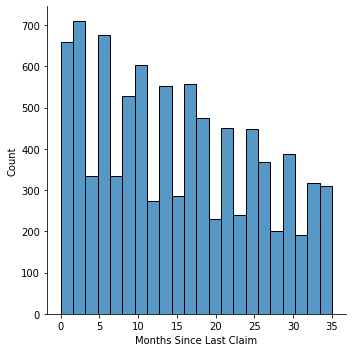

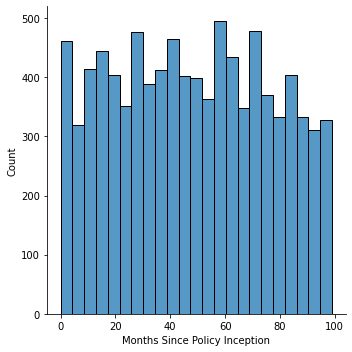

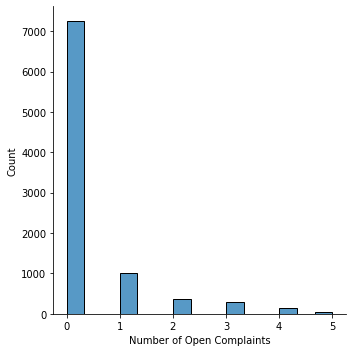

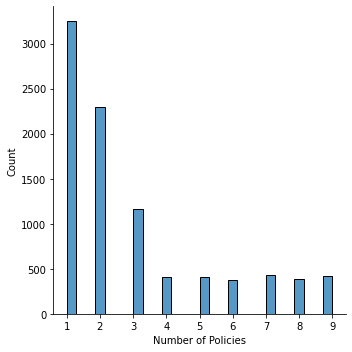

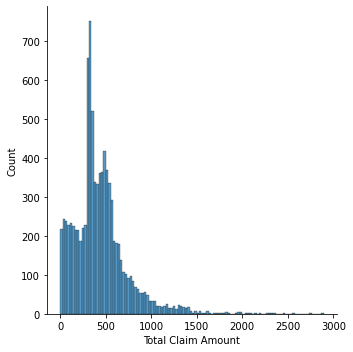

In [62]:
#print distribution plots
%matplotlib inline
for i in range(8):
  sns.displot(numerical.iloc[:,i])
  plt.show()
#sns.(numerical.iloc[:i])
#plt.show()
#plt.show()


(array([4.726e+03, 2.534e+03, 7.960e+02, 3.970e+02, 2.400e+02, 1.730e+02,
        8.800e+01, 6.600e+01, 4.700e+01, 2.800e+01, 1.300e+01, 7.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1898.007675  ,  5969.37635075, 10040.7450265 , 14112.11370225,
        18183.482378  , 22254.85105375, 26326.2197295 , 30397.58840525,
        34468.957081  , 38540.32575675, 42611.6944325 , 46683.06310825,
        50754.431784  , 54825.80045975, 58897.1691355 , 62968.53781125,
        67039.906487  , 71111.27516275, 75182.6438385 , 79254.01251425,
        83325.38119   ]),
 <a list of 20 Patch objects>)

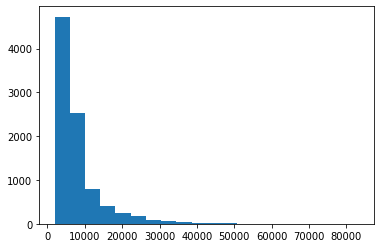

(array([2317.,    0.,  247.,  275.,  690.,  691.,  441.,  452.,  422.,
         327.,  381.,  410.,  410.,  349.,  375.,  323.,  271.,  274.,
         238.,  241.]),
 array([    0.  ,  4999.05,  9998.1 , 14997.15, 19996.2 , 24995.25,
        29994.3 , 34993.35, 39992.4 , 44991.45, 49990.5 , 54989.55,
        59988.6 , 64987.65, 69986.7 , 74985.75, 79984.8 , 84983.85,
        89982.9 , 94981.95, 99981.  ]),
 <a list of 20 Patch objects>)

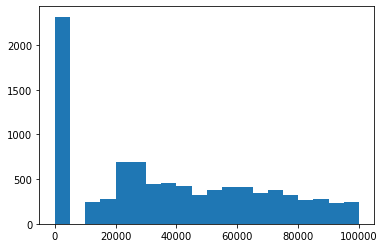

(array([3413., 1302.,  983., 1091., 1127.,  426.,  262.,   48.,   41.,
          39.,  141.,  106.,   38.,   24.,   16.,   29.,   10.,   11.,
          19.,    8.]),
 array([ 61.  ,  72.85,  84.7 ,  96.55, 108.4 , 120.25, 132.1 , 143.95,
        155.8 , 167.65, 179.5 , 191.35, 203.2 , 215.05, 226.9 , 238.75,
        250.6 , 262.45, 274.3 , 286.15, 298.  ]),
 <a list of 20 Patch objects>)

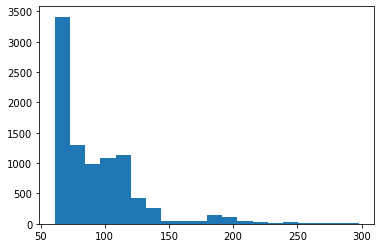

(array([659., 710., 648., 364., 612., 556., 570., 285., 554., 558., 475.,
        231., 451., 450., 422., 182., 407., 372., 317., 311.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  ]),
 <a list of 20 Patch objects>)

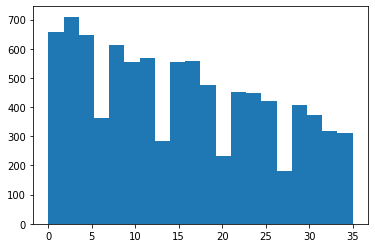

(array([462., 416., 482., 476., 471., 467., 487., 497., 494., 466., 495.,
        505., 513., 435., 482., 462., 380., 421., 395., 328.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 20 Patch objects>)

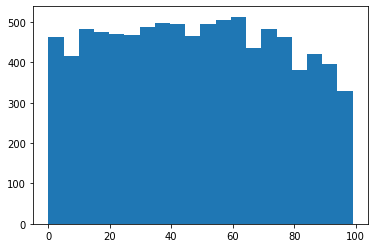

(array([7252.,    0.,    0.,    0., 1011.,    0.,    0.,    0.,  374.,
           0.,    0.,    0.,  292.,    0.,    0.,    0.,  149.,    0.,
           0.,   56.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

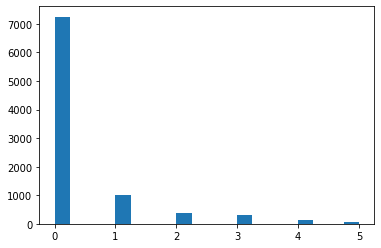

(array([3251.,    0., 2294.,    0.,    0., 1168.,    0.,  409.,    0.,
           0.,  407.,    0.,  372.,    0.,    0.,  433.,    0.,  384.,
           0.,  416.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <a list of 20 Patch objects>)

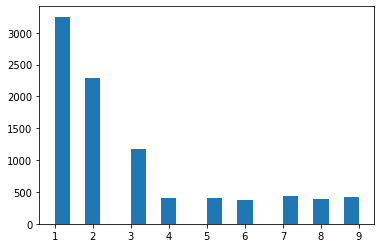

(array([1.279e+03, 1.171e+03, 2.764e+03, 1.971e+03, 8.450e+02, 4.570e+02,
        2.650e+02, 1.210e+02, 1.010e+02, 8.200e+01, 2.500e+01, 1.100e+01,
        1.200e+01, 1.100e+01, 8.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([9.90070000e-02, 1.44756041e+02, 2.89413074e+02, 4.34070108e+02,
        5.78727141e+02, 7.23384175e+02, 8.68041208e+02, 1.01269824e+03,
        1.15735528e+03, 1.30201231e+03, 1.44666934e+03, 1.59132638e+03,
        1.73598341e+03, 1.88064044e+03, 2.02529748e+03, 2.16995451e+03,
        2.31461154e+03, 2.45926858e+03, 2.60392561e+03, 2.74858264e+03,
        2.89323968e+03]),
 <a list of 20 Patch objects>)

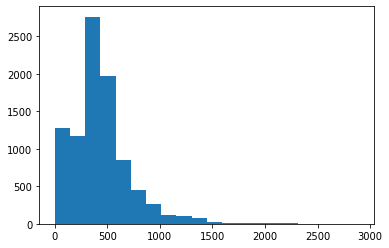

In [93]:
#using matplotlib to create histograms:
%matplotlib inline
#plt.hist(numerical['Monthly Premium Auto'],bins=3)
#plt.show

for i in range(8):
  plt.hist(numerical.iloc[:,i],bins=20)
  #plt.hist(numerical[i],bins=3)
  plt.show()

None of them are normal distributions. But there are a couple in there that could be transformed into normal distributions by using some of the methods we know.

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [64]:
correlations_matrix = numerical1.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,response rate
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.008930
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.011932
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.010966
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.016597
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.002952
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.009881
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.020891
response rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,1.000000


In [71]:
#checking multicollinearty with VIF
import pandas.util.testing as tm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#creating VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = numerical1.columns

#calculating VIF for each feature

vif_data['VIF'] = [variance_inflation_factor(numerical1.values,i) for i in range(len(numerical1.columns))]

print(vif_data)


                         feature       VIF
0        Customer Lifetime Value  2.806327
1                         Income  2.283693
2           Monthly Premium Auto  6.419968
3        Months Since Last Claim  2.784240
4  Months Since Policy Inception  3.273470
5      Number of Open Complaints  1.166610
6             Number of Policies  2.297367
7                  response rate  1.156951


A greater VIF means greater correlation. This is because it is inversely proportional to 1-R^2. VIF above 5 indicates a high multicollinearity. From the VIF calcualted above, only "Monthly Premium auto" has value over 5 (its about 6.419968). This suggests that Monthly Premium Auto might be highly multicollinear.

Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.


In [ ]:
#target variable is total_claim_amount so it is a label, so we should drop it.

numerical1 = numerical.drop(['Total Claim Amount'], axis=1)
numerical1.columns

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

<Figure size 864x360 with 0 Axes>

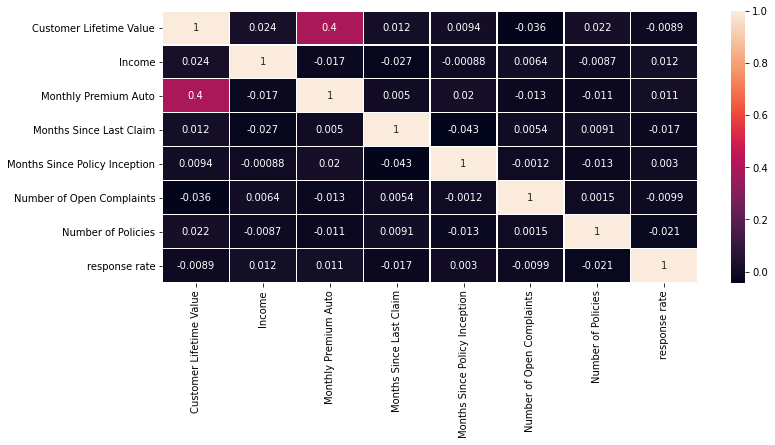

In [77]:
#creating heatmap
plt.figure(figsize = (12,5))
sns.heatmap(correlations_matrix,annot =True, linewidths =.10, data=numerical1)
plt.show()

Do not see any values that are greater than 0.9. So deciding not to drop anything.